<a href="https://colab.research.google.com/github/Ashupathak2001/oibsip_5/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertisingcsv/Advertising.csv


In [ ]:
df=pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**Data Analysis**

In [ ]:
# Remove the unwanted column : (Unnamed: 0)
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(200, 4)

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

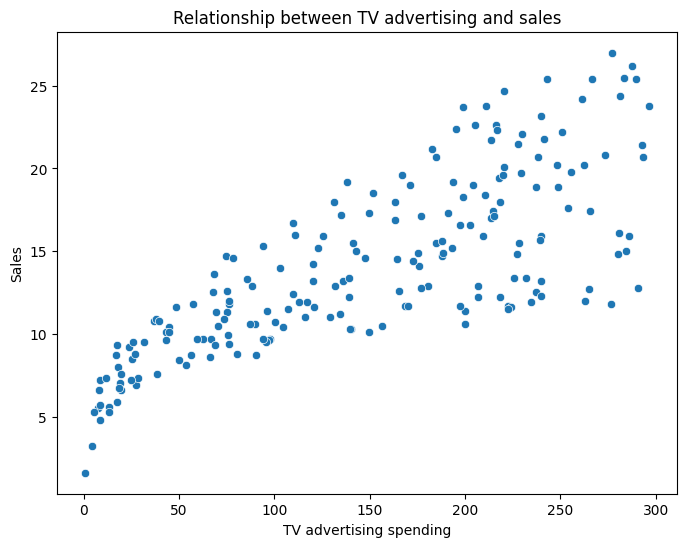

In [ ]:
# Explore and visualize relationships
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot between 'TV' advertising spending and 'Sales'
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='TV',y='Sales')
plt.xlabel('TV advertising spending')
plt.ylabel('Sales')
plt.title('Relationship between TV advertising and sales')
plt.show()

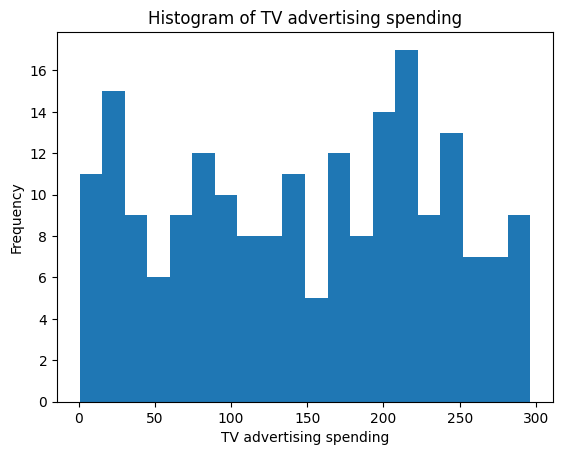

In [ ]:
plt.hist(df['TV'],bins=20)
plt.xlabel('TV advertising spending')
plt.ylabel('Frequency')
plt.title('Histogram of TV advertising spending')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


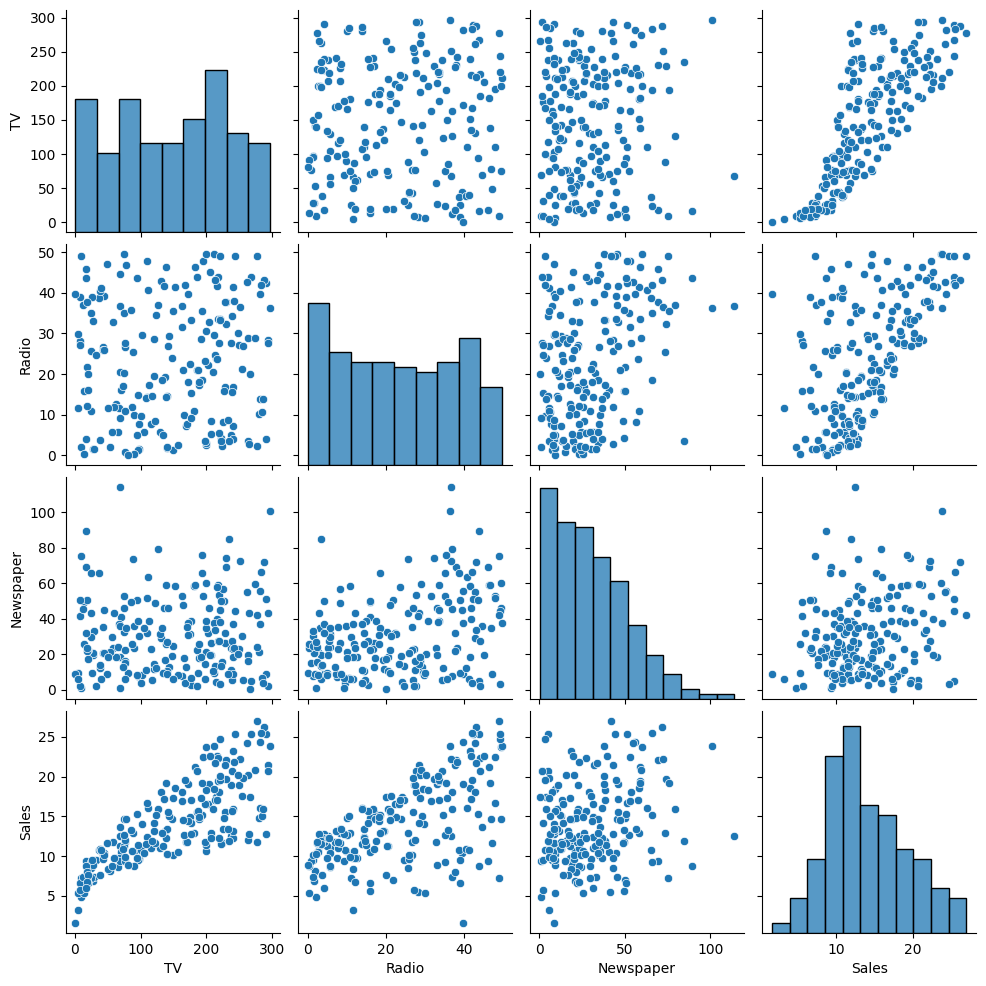

In [ ]:
sns.pairplot(df)
plt.show()

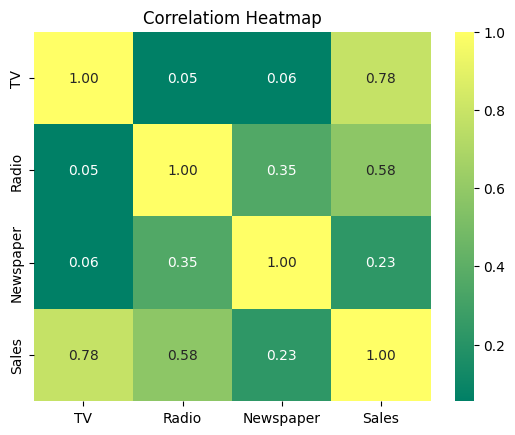

In [ ]:
# calculate the correaltion matrix
correlation_matrix=df.corr()

# create heatmap
sns.heatmap(correlation_matrix,annot=True,cmap='summer',fmt='.2f')
plt.title('Correlatiom Heatmap')
plt.show()

**Feature Engineering**

In [ ]:
# we can create new feature if needed
# eg. creating feature 'Total_Advertising_Spending'
df['Total_Advertising_Spending']=df['TV']+df['Radio']+df['Newspaper']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TV                          200 non-null    float64
 1   Radio                       200 non-null    float64
 2   Newspaper                   200 non-null    float64
 3   Sales                       200 non-null    float64
 4   Total_Advertising_Spending  200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
X=df.drop('Sales',axis=1)
y=df['Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_linear.predict(X_test)

In [ ]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.880023730094191
R-squared: 0.8935163320163658


**DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_tree.predict(X_test)

In [ ]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.5512000000000006
R-squared: 0.9426471858373155


**RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a random forest model
model_forest = RandomForestRegressor(random_state=42)
model_forest.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_forest.predict(X_test)

In [ ]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.083213100000005
R-squared: 0.9599501549620387


**GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train a gradient boosting model
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_gb.predict(X_test)

In [ ]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.7198166560426469
R-squared: 0.9733860811596062


**SVR**

In [ ]:
from sklearn.svm import SVR

# Initialize and train an SVM regression model
model_svm = SVR(kernel='linear')  # You can choose different kernel functions like 'rbf' for non-linear relationships
model_svm.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_svm.predict(X_test)

In [ ]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.147961592347747
R-squared: 0.8836098142101674


**Prediction**

In [ ]:
import random

random.seed(42)
sample_data=df[['TV','Radio','Newspaper']].sample(10)

In [ ]:
sample_data

,TV,Radio,Newspaper
75,16.9,43.7,89.4
46,89.7,9.9,35.7
2,17.2,45.9,69.3
65,69.0,9.3,0.9
25,262.9,3.5,19.5
50,199.8,3.1,34.6
125,87.2,11.8,25.9
100,222.4,4.3,49.8
15,195.4,47.7,52.9
102,280.2,10.1,21.4


In [ ]:
sample_data['Total_Advertising_Spending'] = sample_data['TV'] + sample_data['Radio'] + sample_data['Newspaper']

In [ ]:
sample_data

,TV,Radio,Newspaper,Total_Advertising_Spending
75,16.9,43.7,89.4,150.0
46,89.7,9.9,35.7,135.3
2,17.2,45.9,69.3,132.4
65,69.0,9.3,0.9,79.2
25,262.9,3.5,19.5,285.9
50,199.8,3.1,34.6,237.5
125,87.2,11.8,25.9,124.9
100,222.4,4.3,49.8,276.5
15,195.4,47.7,52.9,296.0
102,280.2,10.1,21.4,311.7


In [ ]:
# Make predictions using the five models
linear_predictions = model_linear.predict(sample_data)
tree_predictions = model_tree.predict(sample_data)
forest_predictions = model_forest.predict(sample_data)
gb_predictions = model_gb.predict(sample_data)
svm_predictions = model_svm.predict(sample_data)

In [ ]:
# Create a table with original value (Sales from sample data) and predictions
sample_data['Original Value'] = df.loc[sample_data.index, 'Sales']

predictions_table = pd.DataFrame({
    'Original Value': sample_data['Original Value'],
    'Linear Regression Prediction': linear_predictions,
    'Decision Tree Prediction': tree_predictions,
    'Random Forest Prediction': forest_predictions,
    'Gradient Boosting Prediction': gb_predictions,
    'SVM Prediction': svm_predictions
})

In [ ]:
predictions_table

,Original Value,Linear Regression Prediction,Decision Tree Prediction,Random Forest Prediction,Gradient Boosting Prediction,SVM Prediction
75,8.7,12.142369,9.3,9.202,9.150895,12.981570
46,10.6,8.840794,10.6,10.755,10.463548,9.055109
2,9.3,12.525584,9.3,8.687,9.012232,13.437896
65,9.3,7.696076,9.7,9.951,9.604432,8.010052
25,12.0,15.442962,12.0,12.067,12.121443,15.199691
50,11.4,12.538300,11.4,11.613,11.550951,12.399201
125,10.6,9.065810,10.6,10.289,9.952817,9.335391
100,11.7,13.833881,11.7,11.937,11.841906,13.637099
15,22.4,20.924350,22.6,21.818,22.061930,21.505260
102,14.8,17.497455,14.8,14.505,14.872028,17.322767
